In [1]:
#Importing important libraries 

import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

In [2]:
#Reading CSV file into pandas

df1 = pd.read_csv('C:\\Users\\Himanshu\\Downloads\\Assignment 1.csv')

In [3]:
#Checking first five rows of the CSV file

df1.head()

,order_id,user_id,address_id,address_pincode,address_city,order_status,total_amount,created_at,payment_status,team_leader,coupon_code,processing_at,discount_amount,commission
0,44990,106778,42862.0,122004,Gurugram,DELIVERED,10.0,2020-07-10 16:23:51.884369+05:30,COD,nageshwarmahto90157844,NaN,10-07-2020,0.0,0.42
1,32971,121745,42561.0,110061,Delhi,DELIVERED,467.5,2020-06-20 18:48:43.802539+05:30,COD,diipak72899731,NaN,20-06-2020,0.0,18.17
2,42071,142399,45637.0,122001,Gurugram,DELIVERED,104.0,2020-07-05 21:25:14.544634+05:30,COD,deepakyadav80106581,SASTAKHAREEDO,06-07-2020,15.0,2.79
3,29518,122805,50676.0,110071,Gurgaon,CANCELLED,0.0,2020-06-15 13:32:56.568548+05:30,COD,archana98689836,CM150,15-06-2020,0.0,0.00
4,42112,135852,53282.0,110074,Delhi,CANCELLED,0.0,2020-07-05 23:08:51.535282+05:30,COD,ramburman81309118,NaN,06-07-2020,0.0,0.00


In [4]:
#Interpreting datatype of the columns

df1.dtypes

order_id             int64
user_id              int64
address_id         float64
address_pincode     object
address_city        object
order_status        object
total_amount       float64
created_at          object
payment_status      object
team_leader         object
coupon_code         object
processing_at       object
discount_amount    float64
commission         float64
dtype: object

In [5]:
#Copying the DataFrame

df2 = df1.copy()

In [6]:
#Changing the data type of 'created_at' column - object to datetime

df2['created_at'] = df2.created_at.astype('datetime64[ns]')

In [7]:
#Again checking the data type of the columns to verify whether 'created_at' column DataType has been changed or not

df2.dtypes

order_id                    int64
user_id                     int64
address_id                float64
address_pincode            object
address_city               object
order_status               object
total_amount              float64
created_at         datetime64[ns]
payment_status             object
team_leader                object
coupon_code                object
processing_at              object
discount_amount           float64
commission                float64
dtype: object

In [8]:
#Retriving months from 'created_at' column

df2['Month'] = df2.created_at.dt.strftime('%B')

In [9]:
df2.head()

,order_id,user_id,address_id,address_pincode,address_city,order_status,total_amount,created_at,payment_status,team_leader,coupon_code,processing_at,discount_amount,commission,Month
0,44990,106778,42862.0,122004,Gurugram,DELIVERED,10.0,2020-07-10 10:53:51.884369,COD,nageshwarmahto90157844,NaN,10-07-2020,0.0,0.42,July
1,32971,121745,42561.0,110061,Delhi,DELIVERED,467.5,2020-06-20 13:18:43.802539,COD,diipak72899731,NaN,20-06-2020,0.0,18.17,June
2,42071,142399,45637.0,122001,Gurugram,DELIVERED,104.0,2020-07-05 15:55:14.544634,COD,deepakyadav80106581,SASTAKHAREEDO,06-07-2020,15.0,2.79,July
3,29518,122805,50676.0,110071,Gurgaon,CANCELLED,0.0,2020-06-15 08:02:56.568548,COD,archana98689836,CM150,15-06-2020,0.0,0.00,June
4,42112,135852,53282.0,110074,Delhi,CANCELLED,0.0,2020-07-05 17:38:51.535282,COD,ramburman81309118,NaN,06-07-2020,0.0,0.00,July


In [10]:
#Removing the rows containing CANCEllED, RTO, DISPATCHED because they do not involve any transactions


df3 = df2[~(df2.order_status == 'CANCELLED')]
df4 = df3[~(df3.order_status == 'RTO')]
df5 = df4[~(df4.order_status == 'DISPATCHED')]
df5

,order_id,user_id,address_id,address_pincode,address_city,order_status,total_amount,created_at,payment_status,team_leader,coupon_code,processing_at,discount_amount,commission,Month
0,44990,106778,42862.0,122004,Gurugram,DELIVERED,10.0,2020-07-10 10:53:51.884369,COD,nageshwarmahto90157844,NaN,10-07-2020,0.0,0.42,July
1,32971,121745,42561.0,110061,Delhi,DELIVERED,467.5,2020-06-20 13:18:43.802539,COD,diipak72899731,NaN,20-06-2020,0.0,18.17,June
2,42071,142399,45637.0,122001,Gurugram,DELIVERED,104.0,2020-07-05 15:55:14.544634,COD,deepakyadav80106581,SASTAKHAREEDO,06-07-2020,15.0,2.79,July
5,31299,102901,42358.0,122015,Gurugram,DELIVERED,77.0,2020-06-18 13:02:48.215438,COD,prashant77038484,NaN,18-06-2020,0.0,3.40,June
8,32082,101358,40197.0,122001,Gurgaon,DELIVERED,87.0,2020-06-19 13:14:12.748481,COD,NeelamRani70117067,NaN,19-06-2020,0.0,2.25,June
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37728,28534,107330,44369.0,110030,Gurgaon,DELIVERED,59.0,2020-06-12 16:04:42.106655,COD,sonu98712237,NaN,13-06-2020,0.0,2.82,June
37729,28535,107330,44369.0,110030,Gurgaon,DELIVERED,111.0,2020-06-12 16:10:08.806664,COD,sonu98712237,NaN,13-06-2020,0.0,3.05,June
37731,28538,111983,47902.0,122016,Gurgaon,PARTIALLY_DELIVERED,843.0,2020-06-12 16:31:54.221778,COD,mnorma99587922,NaN,13-06-2020,0.0,43.46,June
37732,28539,115290,47806.0,122003,Gurgaon,PARTIALLY_DELIVERED,65.0,2020-06-12 16:53:13.364428,PREPAID,ajit95829726,NaN,13-06-2020,0.0,8.00,June


In [11]:
#Retriving the count in the month of May and June

df6 = df5[df5.Month == 'May']
df7 = df5[df5.Month == 'June']

In [12]:
#Count of May

df6.order_id.count()

7421

In [13]:
#Count of June

df7.order_id.count()

10904

Text(0, 0.5, 'Number')

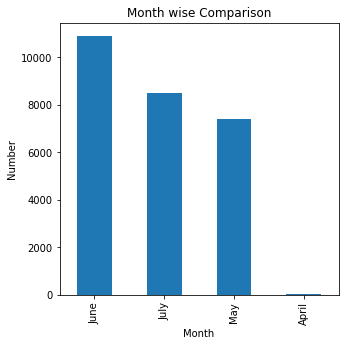

In [14]:
graph = df5['Month'].value_counts().plot(kind = 'bar',figsize = (5,5), title = 'Month wise Comparison')
graph.set_xlabel('Month')
graph.set_ylabel('Number')

In [15]:
#Finding the leader wise Commission

df8 = df5.groupby(['Month','team_leader']).agg({'commission': 'sum'}).reset_index()
df8

,Month,team_leader,commission
0,April,Abhishantshriwastav88005411,13.13
1,April,Gurugram99997399,2.15
2,April,Mukeshjha83758069,45.71
3,April,NeelamRani70117067,6.51
4,April,NeyazAhmed99584570,34.49
...,...,...,...
2183,May,yashpalsharma89209568,21.90
2184,May,yes90068294,99.61
2185,May,yogesh91405554,5.60
2186,May,zakirhossain99995129,24.31


In [16]:
#Retriving the leader having less than 0 commission

df9 = df8[df8.commission<=0]
df9

,Month,team_leader,commission
82,July,aditya98999028,0.0
89,July,ajay88024669,0.0
111,July,amitkumar87089395,0.0
126,July,anil92121799,0.0
180,July,babukhan98717721,0.0
246,July,deepanshurai79822206,0.0
418,July,mamtasingh93552393,0.0
748,July,santosh92895659,0.0
805,July,simran96437576,0.0
818,July,sonusinghariya70113204,0.0


In [17]:
df9[df9.Month == 'June']

,Month,team_leader,commission
1074,June,arvind97163793,0.0
1528,June,rajukumarsingh99106358,0.0
1586,June,rupak98706709,0.0


In [18]:
#Grouping user_id and finding the total amount bought by them in a particular month

table = pd.pivot_table(df5,index=['user_id'],columns=['Month'],values=['total_amount'],aggfunc=np.sum).reset_index()
table

user_id total_amount                        
Month                April    July    June     May
0        5003          NaN   180.0   870.0  1912.5
1        5973          NaN  5373.0  1350.0     NaN
2        8066          NaN   583.0     NaN     NaN
3       36224          NaN  1237.0     NaN     NaN
4       47835          NaN    37.0     NaN     NaN
...       ...          ...     ...     ...     ...
7752   156320          NaN   382.0     NaN     NaN
7753   156348          NaN   501.0     NaN     NaN
7754   156354          NaN   117.0     NaN     NaN
7755   156369          NaN   472.0     NaN     NaN
7756   156386          NaN   230.0     NaN     NaN

[7757 rows x 5 columns]

In [19]:
#Removing Multiindex column

df10 = table.copy()
df10 = df10.xs('total_amount', axis = 1,drop_level = True)
df10

Month,April,July,June,May
0,NaN,180.0,870.0,1912.5
1,NaN,5373.0,1350.0,NaN
2,NaN,583.0,NaN,NaN
3,NaN,1237.0,NaN,NaN
4,NaN,37.0,NaN,NaN
...,...,...,...,...
7752,NaN,382.0,NaN,NaN
7753,NaN,501.0,NaN,NaN
7754,NaN,117.0,NaN,NaN
7755,NaN,472.0,NaN,NaN


In [20]:
#We have to find the users that have bought in May and July but not in June so first of all droping all the rows containing 
#NaN in May  

df11 = df10.dropna(subset = ['May'], how = 'all').reset_index()
df11.drop(['index', 'April'], axis = 'columns', inplace = True)

In [21]:
df11

Month,July,June,May
0,180.0,870.0,1912.5
1,NaN,NaN,142.0
2,NaN,NaN,1100.0
3,1346.0,25973.0,13296.0
4,NaN,NaN,308.0
...,...,...,...
2155,NaN,NaN,106.0
2156,NaN,NaN,688.0
2157,1245.0,NaN,590.0
2158,NaN,NaN,1442.5


In [22]:
#After droping NaN value from May its time to remove NaN value from July because user needs to buy in July for counting

df12 = df11.dropna(subset=['July'],how = 'all').reset_index()
df12.drop('index', axis = 'columns', inplace = True)
df12

Month,July,June,May
0,180.0,870.0,1912.5
1,1346.0,25973.0,13296.0
2,4678.5,9578.0,1253.0
3,1604.0,3542.0,2316.0
4,4038.0,14067.0,3155.0
...,...,...,...
511,607.0,551.0,735.0
512,1813.0,1782.0,1976.5
513,1581.0,3944.0,75.0
514,205.0,961.0,0.0


In [23]:
#Replacing all NaN value in June by zero 

df12['June'].fillna(value = 0, inplace = True)
df12

Month,July,June,May
0,180.0,870.0,1912.5
1,1346.0,25973.0,13296.0
2,4678.5,9578.0,1253.0
3,1604.0,3542.0,2316.0
4,4038.0,14067.0,3155.0
...,...,...,...
511,607.0,551.0,735.0
512,1813.0,1782.0,1976.5
513,1581.0,3944.0,75.0
514,205.0,961.0,0.0


In [24]:
#Removing the values other than 0 from June beacuse a user needs to make zero transaction during that month in our problem

df13=df12[df12.June == 0].reset_index()
df13.drop('index', axis = 'columns', inplace = True)

In [25]:
#Making copy of DataFrame

df14 = df13.copy()
df14

Month,July,June,May
0,326.0,0.0,2104.0
1,264.0,0.0,278.0
2,150.0,0.0,0.0
3,132.0,0.0,302.0
4,1068.0,0.0,1600.0
...,...,...,...
92,10.0,0.0,195.0
93,408.0,0.0,248.5
94,1724.0,0.0,831.0
95,10.0,0.0,203.0


In [26]:
#Removing the rows containing zero in May and June

df14 = df14.loc[df14['July'] * df14['May'] != 0]
df14

Month,July,June,May
0,326.0,0.0,2104.0
1,264.0,0.0,278.0
3,132.0,0.0,302.0
4,1068.0,0.0,1600.0
5,3367.0,0.0,530.0
...,...,...,...
92,10.0,0.0,195.0
93,408.0,0.0,248.5
94,1724.0,0.0,831.0
95,10.0,0.0,203.0


In [27]:
#No. of Reactive users

df14.count()

Month
July    93
June    93
May     93
dtype: int64